In [1]:
#Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading csv file into DataFrame 'df'
df = pd.read_csv("diabetes.csv")

In [3]:
#Checking the head of the DataFrame 'df'
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Checking the tail of the DataFrame 'df'
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
#Getting the metadata of the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
#Checking for NULL values in the DataFrame 'df'
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
columns_with_zero = ["Glucose","BMI","Insulin","BloodPressure","SkinThickness"]
for column in columns_with_zero:
    df[column].replace(0,np.nan,inplace = True)
    df[column].fillna(df[column].mean(),inplace = True)

/tmp/ipykernel_7667/631643642.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].replace(0,np.nan,inplace = True)
/tmp/ipykernel_7667/631643642.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

In [8]:
#Feature Engineering
x = df.drop("Outcome",axis = 1)
y = df["Outcome"]

In [9]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47


In [10]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [11]:
x_scaled

array([[ 0.63994726,  0.86510807, -0.03351824, ...,  0.16629174,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20616153, -0.52985903, ..., -0.85253118,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.0158134 , -0.69530596, ..., -1.33283341,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.0225789 , -0.03351824, ..., -0.91074963,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14180757, -1.02619983, ..., -0.34311972,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94314317, -0.19896517, ..., -0.29945588,
        -0.47378505, -0.87137393]])

In [12]:
#Splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.3,random_state = 64)

In [13]:
#Training the model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [14]:
#Predicting the values
y_pred_logreg = log_reg.predict(x_test)

In [15]:
#Checking the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_logreg = accuracy_score(y_test,y_pred_logreg)
print("Accuracy:",accuracy_logreg*100)

Accuracy: 81.38528138528139


In [16]:
#Implementin confusion matrix
from sklearn.metrics import confusion_matrix
logreg_confusion_matrix = confusion_matrix(y_test,y_pred_logreg)
print("Confusion Matrix")
logreg_confusion_matrix

Confusion Matrix


array([[147,  15],
       [ 28,  41]])

In [17]:
from sklearn.metrics import classification_report
logreg_class_report = classification_report(y_test,y_pred_logreg)
print("Classification Report")
print(logreg_class_report)

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       162
           1       0.73      0.59      0.66        69

    accuracy                           0.81       231
   macro avg       0.79      0.75      0.76       231
weighted avg       0.81      0.81      0.81       231



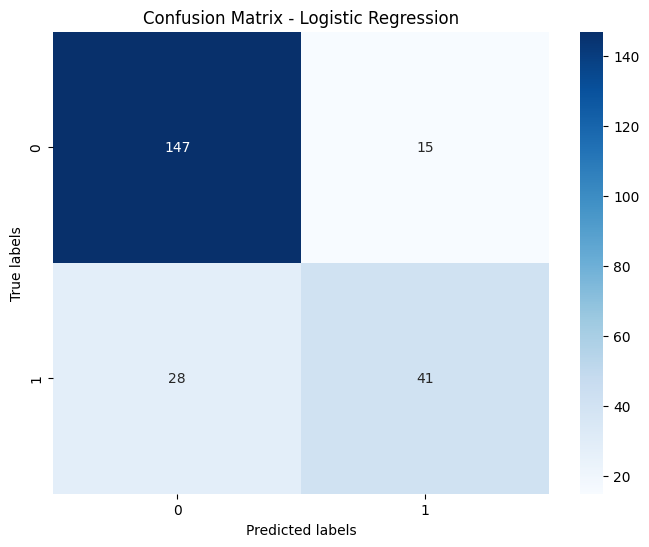

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a confusion matrix
logreg_confusion_matrix = confusion_matrix(y_test, y_pred_logreg)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(logreg_confusion_matrix, annot=True, cmap="Blues", fmt="d")

# Add labels and title
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [19]:
#Training the model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [20]:
#Predicting the values
y_pred_rf = rf.predict(x_test)

In [21]:
#Checking the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_rf = accuracy_score(y_test,y_pred_rf)
print("Accuracy:",accuracy_rf*100)

Accuracy: 79.65367965367966


In [22]:
#Implementing a confusion matrix
from sklearn.metrics import confusion_matrix
rf_confusion_matrix = confusion_matrix(y_test,y_pred_rf)
print("Confusion Matrix")
rf_confusion_matrix

Confusion Matrix


array([[141,  21],
       [ 26,  43]])

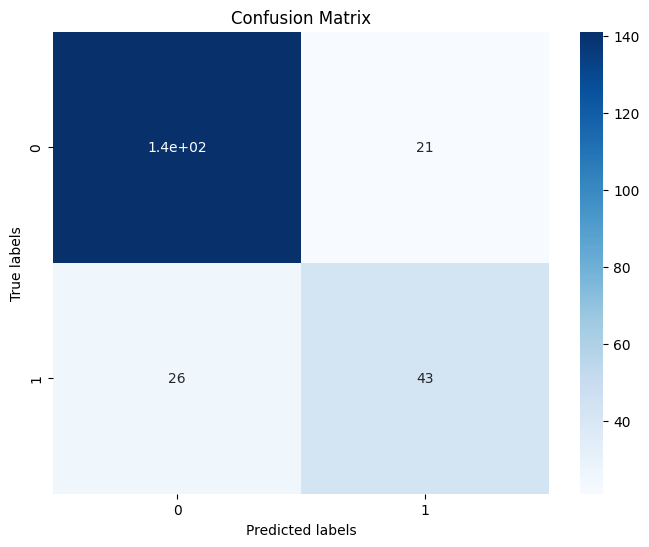

In [23]:

# Create a confusion matrix
#rf_confusion_matrix = confusion_matrix(y_test, y_pred_rf)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(rf_confusion_matrix, annot=True, cmap="Blues")

# Add labels and title
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

In [24]:
print("Accuracy of Logistic Regression Algorithm",accuracy_logreg*100)
print("Accuracy of Random Forest Algorithm",accuracy_rf*100)

Accuracy of Logistic Regression Algorithm 81.38528138528139
Accuracy of Random Forest Algorithm 79.65367965367966


In [28]:
import pickle
model_filename = "rf_model.pkl"
with open(model_filename,'wb') as file:
    pickle.dump(log_reg,file)

In [29]:
with open(model_filename,'rb') as file:
    loaded_model = pickle.load(file)

In [76]:
def predict(input_data):
    input_data_scaled = scaler.transform([input_data])
    prediction = loaded_model.predict(input_data_scaled)
    if prediction[0] == 1:
        return "The person is diabetic"
    else:
        return "The person is not diabetic"

In [78]:
predict([6,148,72,35,0,33.6,0.627,50])

/home/muazzamwarunkar/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


'The person is diabetic'

In [79]:
import gradio as gr
import joblib

In [80]:
model = joblib.load("/home/muazzamwarunkar/Desktop/Python Tutorials (Visual Labs)/rf_model.pkl")

In [87]:
def predict_diabetes(Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age):
    input_data = pd.DataFrame([[Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age]])
    columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
    input_data_scaled = scaler.transform(input_data)
    prediction = model.predict(input_data_scaled)
    return "The patient is Diabetic" if prediction[0] == 1 else "The patient is not Diabetic"

In [88]:
predict_diabetes(6,148,72,35,0,33.6,0.627,50)

/home/muazzamwarunkar/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


'The patient is Diabetic'

In [2]:
interface = gr.Interface(fn = predict_diabetes,
                         title = "Diabetes Prediction",
                         description = "Predict if a patient has diabetes or not",
                         inputs = [
                             gr.components.Number(label="Pregnancies"),
                             gr.components.Number(label="Glucose"),
                             gr.components.Number(label="BloodPressure"),
                             gr.components.Number(label="SkinThickness"),
                             gr.components.Number(label="Insulin"),
                             gr.components.Number(label="BMI"),
                             gr.components.Number(label="DiabetesPedigreeFunction"),
                             gr.components.Number(label="Age")
],
outputs = gr.components.Textbox(label = "Prediction"),
)
interface.launch()

NameError: name 'gr' is not defined